# Problem Statment
* To predict CO₂ emissions of vehicles from MY2022 Fuel Consumption Ratings dataset using regression techniques. The project involves preprocessing (scaling, encoding), applying PCA for dimensionality reduction, and evaluating model performance

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
data=pd.read_csv("MY2022 Fuel Consumption Ratings.csv")

In [5]:
data

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,5,5
942,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219,5,5
943,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232,5,7
944,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236,5,5


# Domain Analysis
* This dataset shows the fuel consumption of 2022 model vehicles in Canada.

* It includes details like make, model, fuel type, engine size, and emissions.

* The data helps compare the fuel efficiency of different vehicles.

* We can see how fuel type, transmission, and vehicle class affect efficiency.

* This analysis is useful for both consumer choices and environmental studies.

# Basic Checks

In [6]:
data.shape

(946, 15)

In [7]:
data.dtypes

Model Year                             int64
Make                                  object
Model                                 object
Vehicle Class                         object
Engine Size(L)                       float64
Cylinders                              int64
Transmission                          object
Fuel Type                             object
Fuel Consumption (City (L/100 km)    float64
Fuel Consumption(Hwy (L/100 km))     float64
Fuel Consumption(Comb (L/100 km))    float64
Fuel Consumption(Comb (mpg))           int64
CO2 Emissions(g/km)                    int64
CO2 Rating                             int64
Smog Rating                            int64
dtype: object

In [8]:
data.tail()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
941,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,5,5
942,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219,5,5
943,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232,5,7
944,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236,5,5
945,2022,Volvo,XC90 T6 AWD,SUV: Standard,2.0,4,AS8,Z,12.4,8.9,10.8,26,252,5,7


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Model Year                         946 non-null    int64  
 1   Make                               946 non-null    object 
 2   Model                              946 non-null    object 
 3   Vehicle Class                      946 non-null    object 
 4   Engine Size(L)                     946 non-null    float64
 5   Cylinders                          946 non-null    int64  
 6   Transmission                       946 non-null    object 
 7   Fuel Type                          946 non-null    object 
 8   Fuel Consumption (City (L/100 km)  946 non-null    float64
 9   Fuel Consumption(Hwy (L/100 km))   946 non-null    float64
 10  Fuel Consumption(Comb (L/100 km))  946 non-null    float64
 11  Fuel Consumption(Comb (mpg))       946 non-null    int64  

In [10]:
data.Make.unique()

array(['Acura', 'Alfa Romeo', 'Aston Martin', 'Audi', 'Bentley', 'BMW',
       'Bugatti', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge',
       'FIAT', 'Ford', 'Genesis', 'GMC', 'Honda', 'Hyundai', 'Infiniti',
       'Jaguar', 'Jeep', 'Kia', 'Lamborghini', 'Land Rover', 'Lexus',
       'Lincoln', 'Maserati', 'Mazda', 'Mercedes-Benz', 'MINI',
       'Mitsubishi', 'Nissan', 'Porsche', 'Ram', 'Rolls-Royce', 'Subaru',
       'Toyota', 'Volkswagen', 'Volvo'], dtype=object)

In [11]:
data.columns

Index(['Model Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size(L)',
       'Cylinders', 'Transmission', 'Fuel Type',
       'Fuel Consumption (City (L/100 km)', 'Fuel Consumption(Hwy (L/100 km))',
       'Fuel Consumption(Comb (L/100 km))', 'Fuel Consumption(Comb (mpg))',
       'CO2 Emissions(g/km)', 'CO2 Rating', 'Smog Rating'],
      dtype='object')

In [12]:
print(data['Make'].unique())

['Acura' 'Alfa Romeo' 'Aston Martin' 'Audi' 'Bentley' 'BMW' 'Bugatti'
 'Buick' 'Cadillac' 'Chevrolet' 'Chrysler' 'Dodge' 'FIAT' 'Ford' 'Genesis'
 'GMC' 'Honda' 'Hyundai' 'Infiniti' 'Jaguar' 'Jeep' 'Kia' 'Lamborghini'
 'Land Rover' 'Lexus' 'Lincoln' 'Maserati' 'Mazda' 'Mercedes-Benz' 'MINI'
 'Mitsubishi' 'Nissan' 'Porsche' 'Ram' 'Rolls-Royce' 'Subaru' 'Toyota'
 'Volkswagen' 'Volvo']


In [13]:
print(data['Fuel Type'].unique())

['Z' 'X' 'D' 'E']


In [14]:
print(data['Transmission'].unique())

['AM8' 'AS10' 'A8' 'A9' 'AM7' 'AS8' 'M6' 'AS6' 'AV' 'AS9' 'A10' 'A6' 'M5'
 'M7' 'AV7' 'AV1' 'AM6' 'AS7' 'AV8' 'AV6' 'AV10' 'AS5' 'A7']


In [15]:
data.describe()

,Model Year,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
count,946.0,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,2022.0,3.198732,5.668076,12.506448,9.363319,11.092072,27.247357,259.172304,4.539112,4.950317
std,0.0,1.374814,1.932670,3.452043,2.285125,2.876276,7.685217,64.443149,1.471799,1.679842
min,2022.0,1.200000,3.000000,4.000000,3.900000,4.000000,11.000000,94.000000,1.000000,1.000000
25%,2022.0,2.000000,4.000000,10.200000,7.700000,9.100000,22.000000,213.250000,3.000000,3.000000
50%,2022.0,3.000000,6.000000,12.200000,9.200000,10.800000,26.000000,257.000000,5.000000,5.000000
75%,2022.0,3.800000,6.000000,14.700000,10.700000,12.900000,31.000000,300.750000,5.000000,6.000000
max,2022.0,8.000000,16.000000,30.300000,20.900000,26.100000,71.000000,608.000000,10.000000,7.000000


# Exploratory data analysis

### Univariate Analysis

<Axes: xlabel='Fuel Type', ylabel='count'>

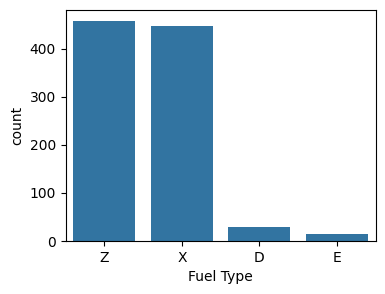

In [16]:
plt.figure(figsize=(4,3))
sns.countplot(data=data,x='Fuel Type')

In [17]:
data.columns

Index(['Model Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size(L)',
       'Cylinders', 'Transmission', 'Fuel Type',
       'Fuel Consumption (City (L/100 km)', 'Fuel Consumption(Hwy (L/100 km))',
       'Fuel Consumption(Comb (L/100 km))', 'Fuel Consumption(Comb (mpg))',
       'CO2 Emissions(g/km)', 'CO2 Rating', 'Smog Rating'],
      dtype='object')

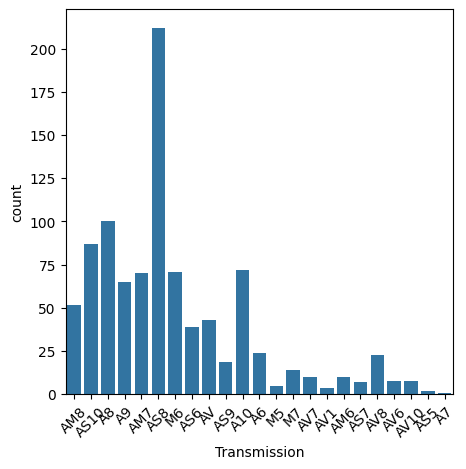

In [18]:
plt.figure(figsize=(5,5))
sns.countplot(x="Transmission", data=data)
plt.xticks(rotation=45)   # labels readable banane ke liye
plt.show()

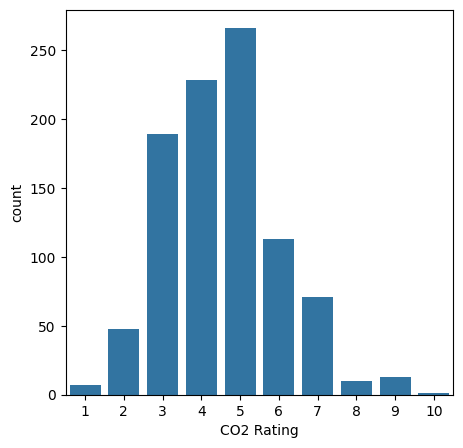

In [19]:
plt.figure(figsize=(5,5))
sns.countplot(x='CO2 Rating', data=data)
plt.show()

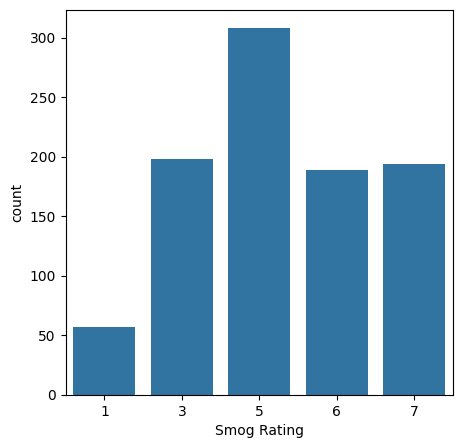

In [20]:
plt.figure(figsize=(5,5))
sns.countplot(x='Smog Rating', data=data)
plt.show()

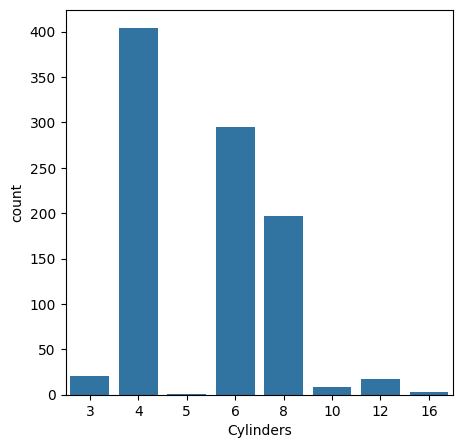

In [21]:
plt.figure(figsize=(5,5))
sns.countplot(x='Cylinders', data=data)
plt.show()


### Biavariate Analysis

In [22]:
data.dtypes

Model Year                             int64
Make                                  object
Model                                 object
Vehicle Class                         object
Engine Size(L)                       float64
Cylinders                              int64
Transmission                          object
Fuel Type                             object
Fuel Consumption (City (L/100 km)    float64
Fuel Consumption(Hwy (L/100 km))     float64
Fuel Consumption(Comb (L/100 km))    float64
Fuel Consumption(Comb (mpg))           int64
CO2 Emissions(g/km)                    int64
CO2 Rating                             int64
Smog Rating                            int64
dtype: object

<Axes: xlabel='Engine Size(L)', ylabel='CO2 Emissions(g/km)'>

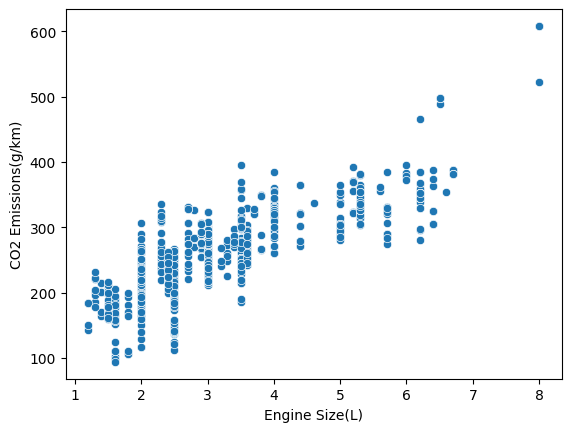

In [23]:
# Scatter plot btw Engine size(L) and Co2 Emissions
sns.scatterplot(data=data,x='Engine Size(L)',y='CO2 Emissions(g/km)')

<Axes: xlabel='Fuel Consumption(Comb (L/100 km))', ylabel='CO2 Emissions(g/km)'>

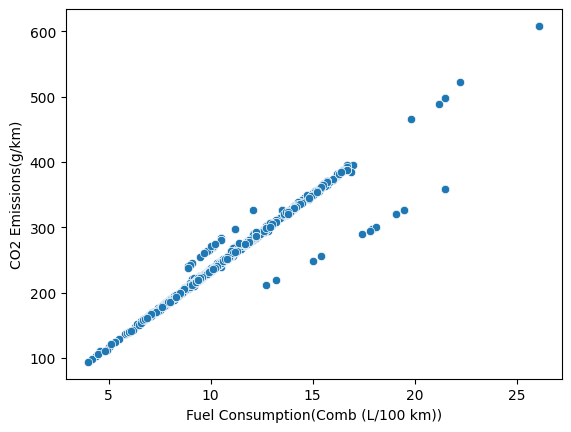

In [24]:
#scatter plot btw Fuel Consumption (Combined) vs CO₂ Emissions
sns.scatterplot(x="Fuel Consumption(Comb (L/100 km))", y="CO2 Emissions(g/km)", data=data)

<Axes: xlabel='Cylinders', ylabel='CO2 Emissions(g/km)'>

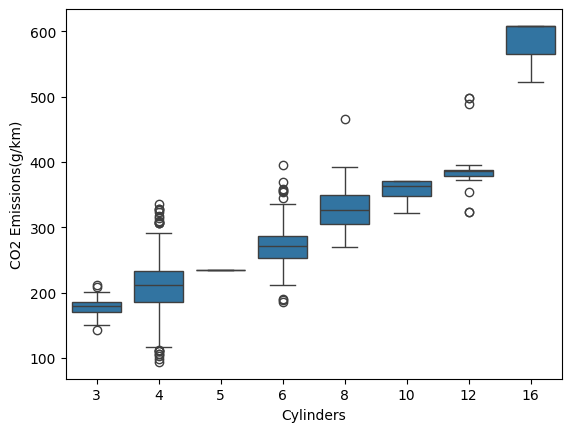

In [25]:
# Box plot btw Cylinders vs CO₂ Emissions
sns.boxplot(x="Cylinders", y="CO2 Emissions(g/km)", data=data)

<Axes: xlabel='Fuel Type', ylabel='CO2 Emissions(g/km)'>

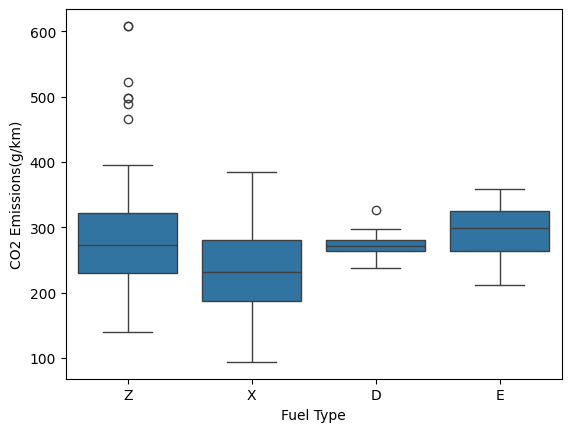

In [26]:
 # boxplot btw Fuel Type vs CO₂ Emissions
sns.boxplot(x="Fuel Type", y="CO2 Emissions(g/km)", data=data)

In [27]:
data['Fuel Type'].unique()

array(['Z', 'X', 'D', 'E'], dtype=object)

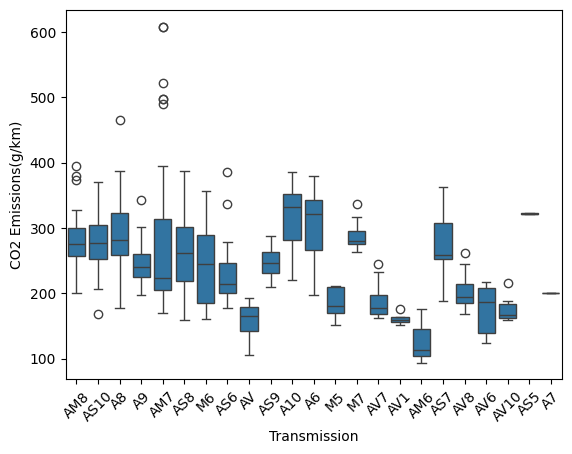

In [28]:
 # boxplot btw Transmission vs CO₂ Emissions
sns.boxplot(x="Transmission", y="CO2 Emissions(g/km)", data=data)
plt.xticks(rotation=45)
plt.show()

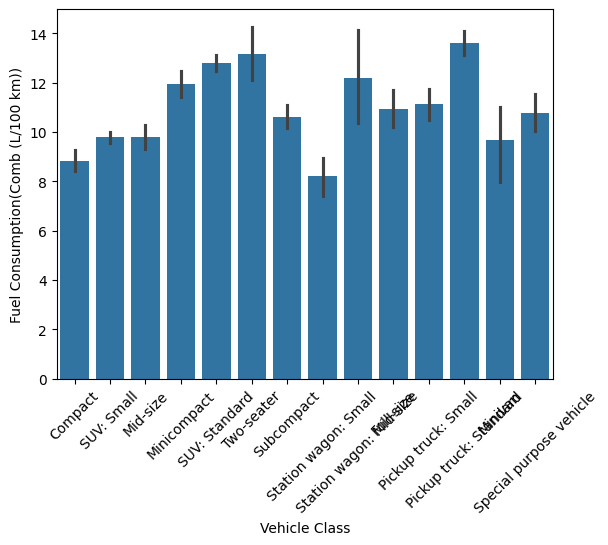

In [29]:
# barplot btw Vehicle Class vs Fuel Consumption (Combined)
sns.barplot(x="Vehicle Class", y="Fuel Consumption(Comb (L/100 km))", data=data)
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='CO2 Emissions(g/km)', ylabel='Count'>

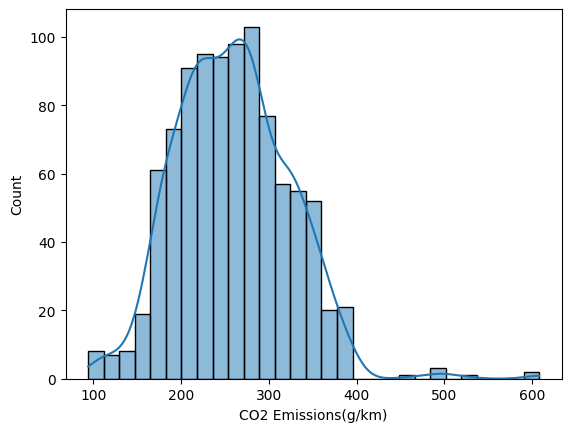

In [30]:
# Distribution = CO₂ Emissions (g/km)
sns.histplot(data["CO2 Emissions(g/km)"], kde=True)

<Axes: xlabel='Fuel Consumption(Comb (L/100 km))', ylabel='Count'>

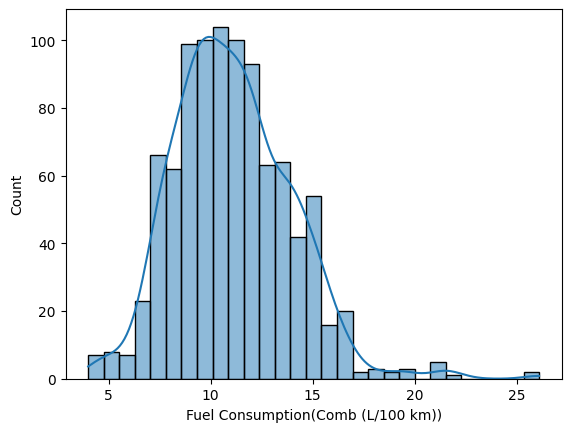

In [31]:
# Fuel Consumption (Combined L/100km)
sns.histplot(data["Fuel Consumption(Comb (L/100 km))"], kde=True)

<Axes: xlabel='Engine Size(L)', ylabel='Count'>

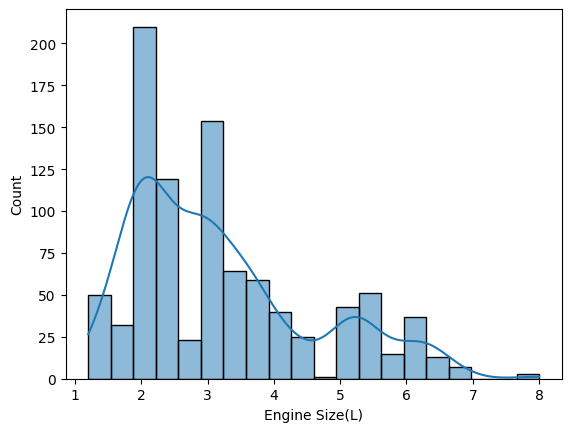

In [32]:
# Engine Size (L)
sns.histplot(data["Engine Size(L)"], bins=20, kde=True)

In [33]:
data.dtypes

Model Year                             int64
Make                                  object
Model                                 object
Vehicle Class                         object
Engine Size(L)                       float64
Cylinders                              int64
Transmission                          object
Fuel Type                             object
Fuel Consumption (City (L/100 km)    float64
Fuel Consumption(Hwy (L/100 km))     float64
Fuel Consumption(Comb (L/100 km))    float64
Fuel Consumption(Comb (mpg))           int64
CO2 Emissions(g/km)                    int64
CO2 Rating                             int64
Smog Rating                            int64
dtype: object

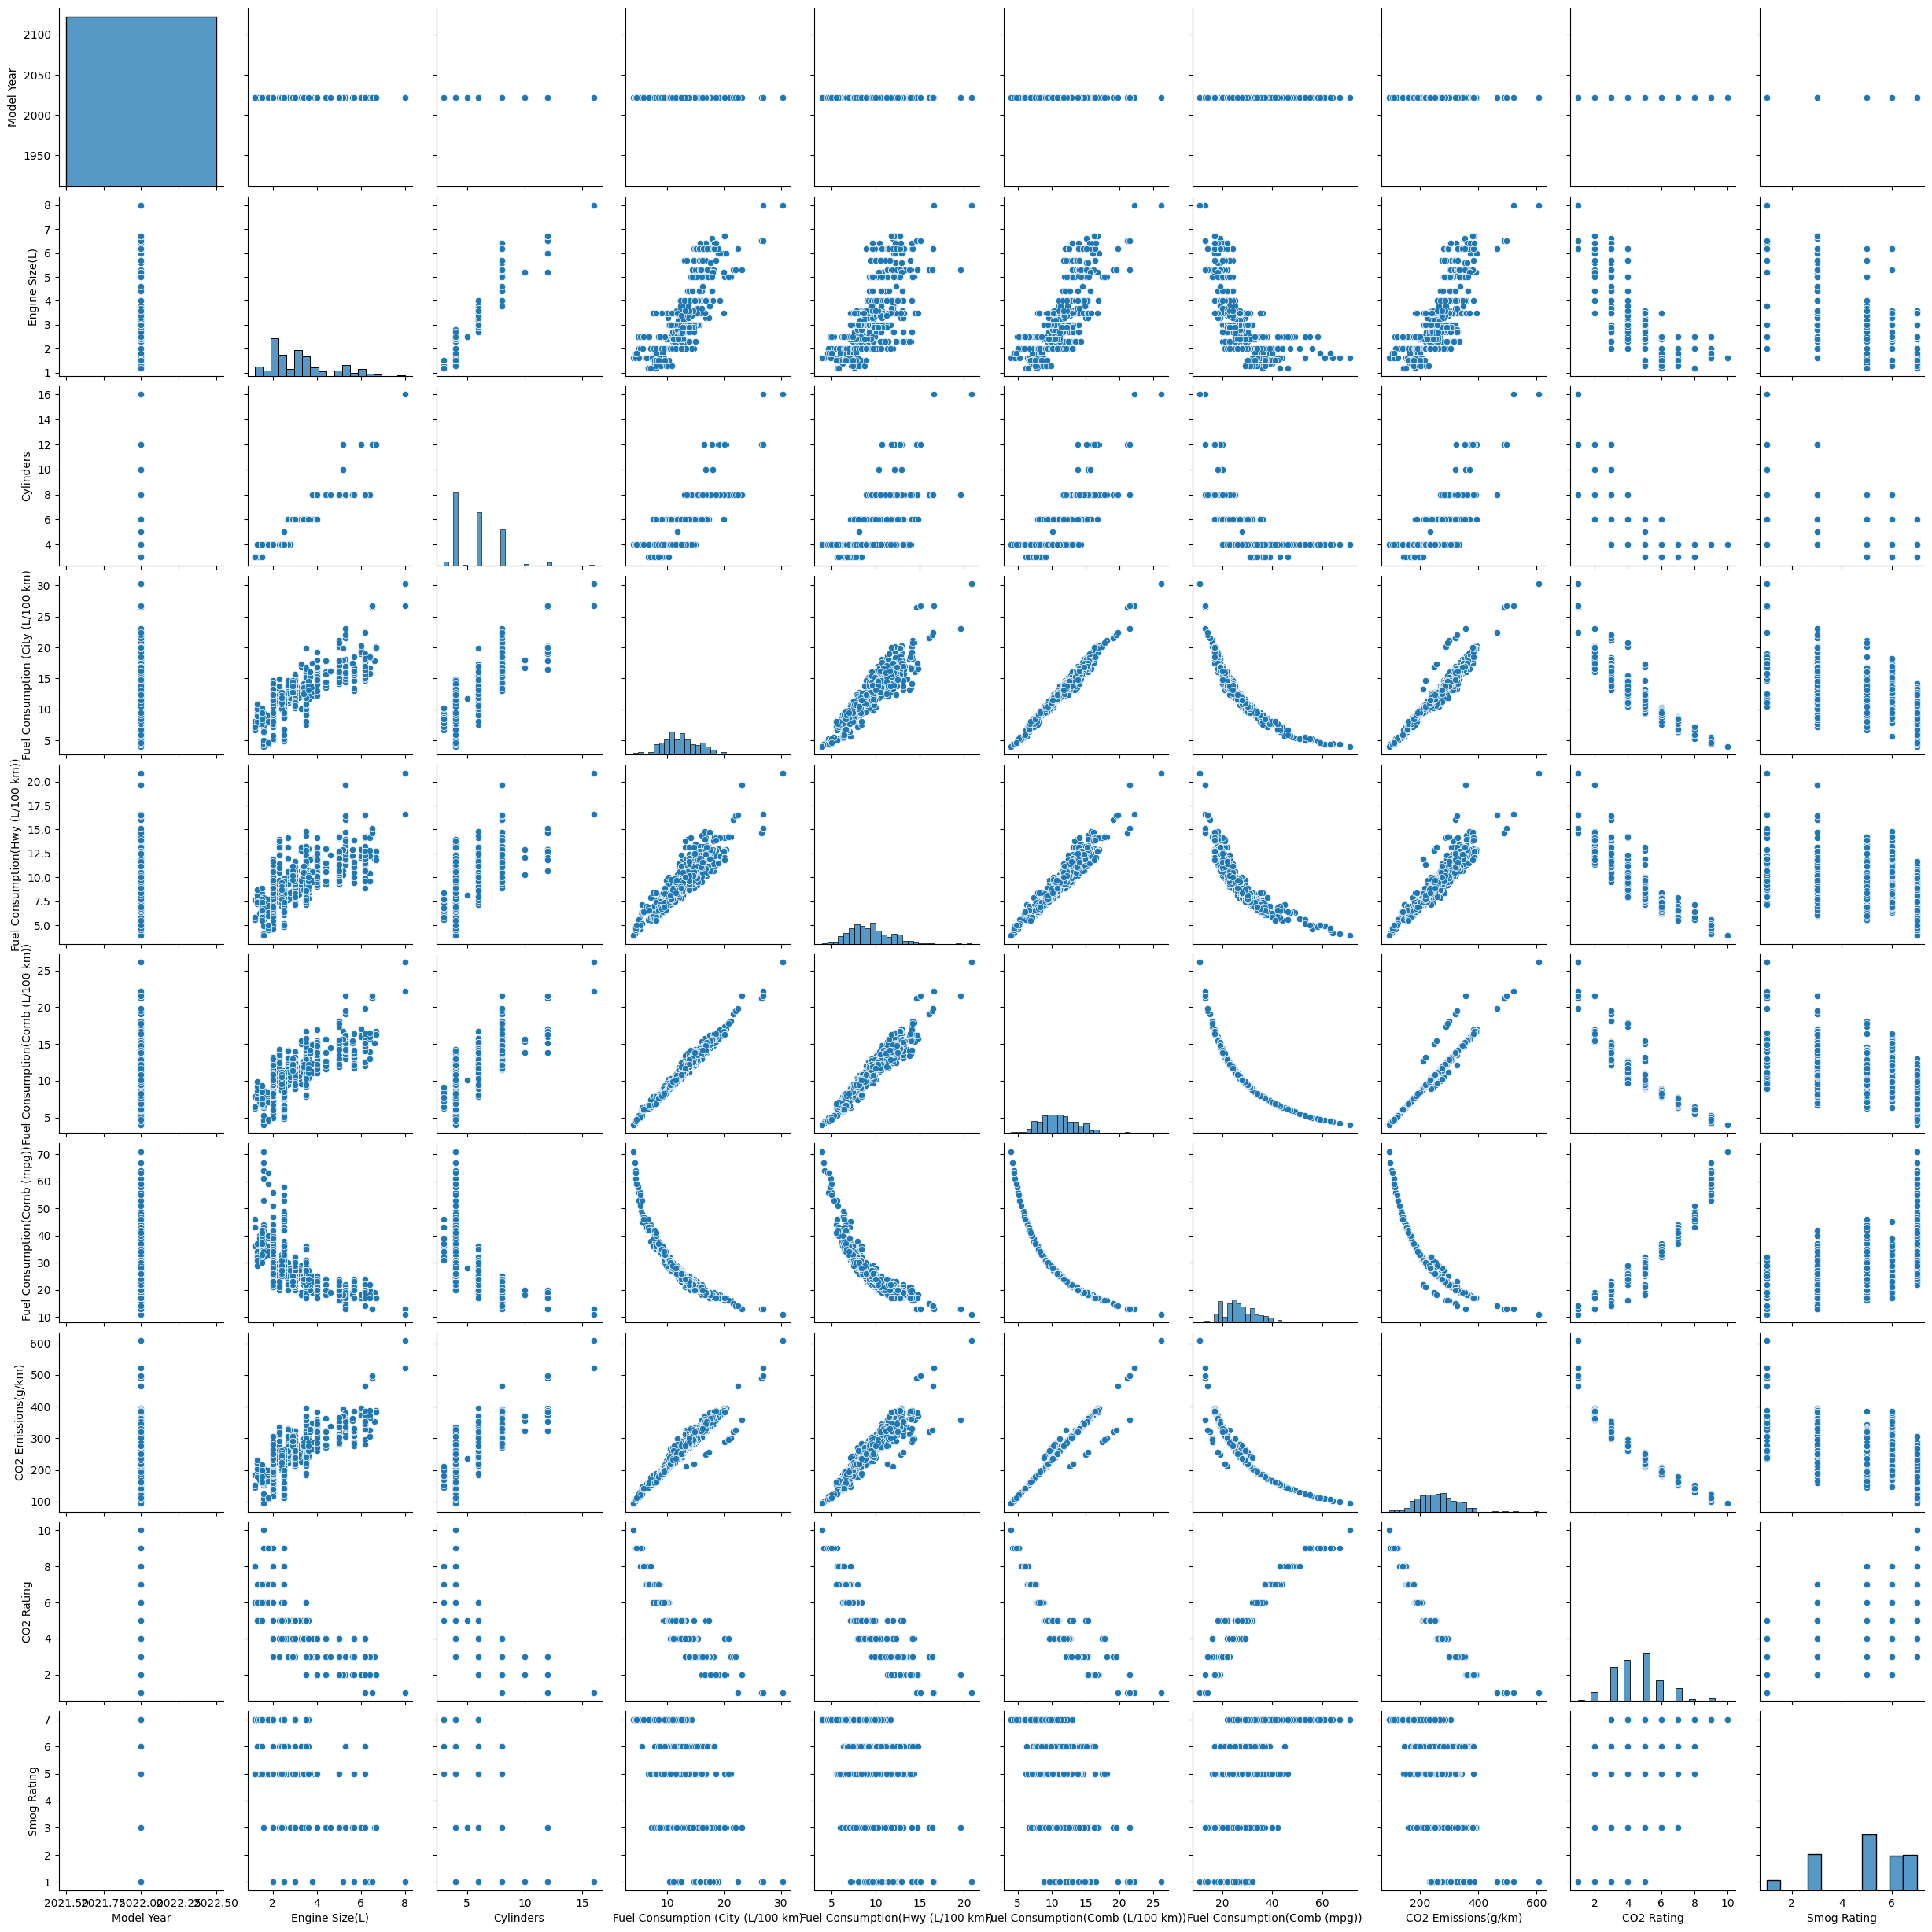

In [34]:
# Pair plot
sns.pairplot(data=data)
plt.show()

## Insight
* Most cars in the 2022 dataset have 4-cylinder engines, showing a focus on efficiency.

* Fuel type impacts emissions — hybrids are lowest, while gasoline and diesel cars emit more CO₂.

* SUVs and trucks consume more fuel and produce higher emissions compared to compact cars.

* There is a strong linear relation between combined fuel consumption and CO₂ emissions. 

# Data Preprocessing 

In [35]:
data.isnull().sum()

Model Year                           0
Make                                 0
Model                                0
Vehicle Class                        0
Engine Size(L)                       0
Cylinders                            0
Transmission                         0
Fuel Type                            0
Fuel Consumption (City (L/100 km)    0
Fuel Consumption(Hwy (L/100 km))     0
Fuel Consumption(Comb (L/100 km))    0
Fuel Consumption(Comb (mpg))         0
CO2 Emissions(g/km)                  0
CO2 Rating                           0
Smog Rating                          0
dtype: int64

In [36]:
data.duplicated().sum()

np.int64(0)

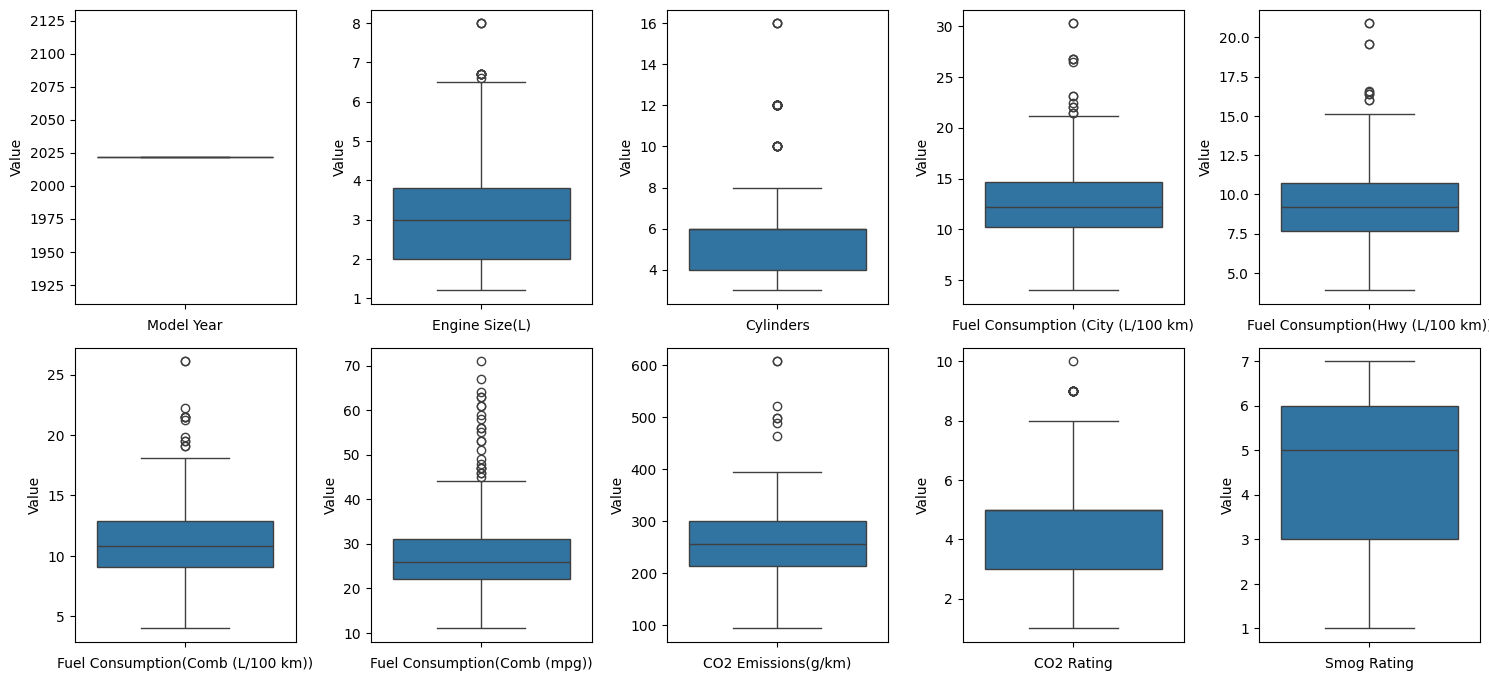

In [37]:
plt.figure(figsize=(15,10))
plotnumber = 1

for col in data.select_dtypes(include=["int64","float64"]).columns:  # only numeric cols
    if plotnumber <= len(data.select_dtypes(include=["int64","float64"]).columns):
        plt.subplot(3,5,plotnumber)
        sns.boxplot(y=data[col])
        plt.xlabel(col, fontsize=10)
        plt.ylabel("Value", fontsize=10)
    plotnumber += 1

plt.tight_layout()
plt.show()

In [38]:
# import numpy as np

for col in data.select_dtypes(include=["int64","float64"]).columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = ((data[col] < lower) | (data[col] > upper)).sum()
    perc = (outliers / len(data[col])) * 100

    if perc < 5:
        print(f"{col}: {perc:.2f}% outliers")


Model Year: 0.00% outliers
Engine Size(L): 1.16% outliers
Cylinders: 2.96% outliers
Fuel Consumption (City (L/100 km): 1.37% outliers
Fuel Consumption(Hwy (L/100 km)): 1.06% outliers
Fuel Consumption(Comb (L/100 km)): 1.37% outliers
Fuel Consumption(Comb (mpg)): 2.43% outliers
CO2 Emissions(g/km): 0.74% outliers
CO2 Rating: 1.48% outliers
Smog Rating: 0.00% outliers


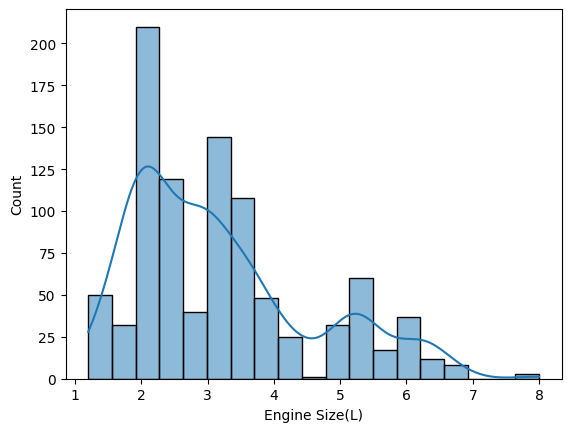

In [39]:
sns.histplot(data=data['Engine Size(L)'],kde=True)
plt.show()

# Conversion

In [40]:
# data['Make'].unique()

In [41]:
# Reduce high-cardinality
top_models = data['Model'].value_counts().head(20).index
data['Model'] = data['Model'].apply(lambda x: x if x in top_models else 'Other')

top_makes = data['Make'].value_counts().head(10).index
data['Make'] = data['Make'].apply(lambda x: x if x in top_makes else 'Other')

top_classes = data['Vehicle Class'].value_counts().head(10).index
data['Vehicle Class'] = data['Vehicle Class'].apply(lambda x: x if x in top_classes else 'Other')


In [42]:
from sklearn.preprocessing import OneHotEncoder
categorical_cols = ['Make', 'Model', 'Fuel Type', 'Transmission','Vehicle Class']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
print(f"New shape: {data.shape}")

New shape: (946, 75)


In [43]:
# # One-hot encode all categorical columns
# categorical_cols = ['Make', 'Model', 'Fuel Type', 'Transmission']
# data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)


In [44]:
data.dtypes

Model Year                                int64
Engine Size(L)                          float64
Cylinders                                 int64
Fuel Consumption (City (L/100 km)       float64
Fuel Consumption(Hwy (L/100 km))        float64
                                         ...   
Vehicle Class_Pickup truck: Standard       bool
Vehicle Class_SUV: Small                   bool
Vehicle Class_SUV: Standard                bool
Vehicle Class_Subcompact                   bool
Vehicle Class_Two-seater                   bool
Length: 75, dtype: object

In [45]:
data

,Model Year,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating,...,Vehicle Class_Full-size,Vehicle Class_Mid-size,Vehicle Class_Minicompact,Vehicle Class_Other,Vehicle Class_Pickup truck: Small,Vehicle Class_Pickup truck: Standard,Vehicle Class_SUV: Small,Vehicle Class_SUV: Standard,Vehicle Class_Subcompact,Vehicle Class_Two-seater
0,2022,2.4,4,9.9,7.0,8.6,33,200,6,3,...,False,False,False,False,False,False,False,False,False,False
1,2022,3.5,6,12.6,9.4,11.2,25,263,4,5,...,False,False,False,False,False,False,True,False,False,False
2,2022,2.0,4,11.0,8.6,9.9,29,232,5,6,...,False,False,False,False,False,False,True,False,False,False
3,2022,2.0,4,11.3,9.1,10.3,27,242,5,6,...,False,False,False,False,False,False,True,False,False,False
4,2022,2.0,4,11.2,8.0,9.8,29,230,5,7,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,2022,2.0,4,10.7,7.7,9.4,30,219,5,5,...,False,False,False,False,False,False,True,False,False,False
942,2022,2.0,4,10.5,8.1,9.4,30,219,5,5,...,False,False,False,False,False,False,True,False,False,False
943,2022,2.0,4,11.0,8.7,9.9,29,232,5,7,...,False,False,False,False,False,False,True,False,False,False
944,2022,2.0,4,11.5,8.4,10.1,28,236,5,5,...,False,False,False,False,False,False,False,True,False,False


In [46]:
bool_cols = data.select_dtypes('bool').columns
data[bool_cols] = data[bool_cols].astype(int)

In [47]:
data

,Model Year,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating,...,Vehicle Class_Full-size,Vehicle Class_Mid-size,Vehicle Class_Minicompact,Vehicle Class_Other,Vehicle Class_Pickup truck: Small,Vehicle Class_Pickup truck: Standard,Vehicle Class_SUV: Small,Vehicle Class_SUV: Standard,Vehicle Class_Subcompact,Vehicle Class_Two-seater
0,2022,2.4,4,9.9,7.0,8.6,33,200,6,3,...,0,0,0,0,0,0,0,0,0,0
1,2022,3.5,6,12.6,9.4,11.2,25,263,4,5,...,0,0,0,0,0,0,1,0,0,0
2,2022,2.0,4,11.0,8.6,9.9,29,232,5,6,...,0,0,0,0,0,0,1,0,0,0
3,2022,2.0,4,11.3,9.1,10.3,27,242,5,6,...,0,0,0,0,0,0,1,0,0,0
4,2022,2.0,4,11.2,8.0,9.8,29,230,5,7,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,2022,2.0,4,10.7,7.7,9.4,30,219,5,5,...,0,0,0,0,0,0,1,0,0,0
942,2022,2.0,4,10.5,8.1,9.4,30,219,5,5,...,0,0,0,0,0,0,1,0,0,0
943,2022,2.0,4,11.0,8.7,9.9,29,232,5,7,...,0,0,0,0,0,0,1,0,0,0
944,2022,2.0,4,11.5,8.4,10.1,28,236,5,5,...,0,0,0,0,0,0,0,1,0,0


# split x and y

In [ ]:
x = data.drop(['CO2 Emissions(g/km)','Model Year'], axis=1)  # features
y = data['CO2 Emissions(g/km)']               # target


In [115]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# PCA

In [120]:
pca = PCA(n_components=40)  # या 50, depending on how much variance you want to preserve
x_pca = pca.fit_transform(x_scaled)

print("New shape after PCA:", x_pca.shape)

New shape after PCA: (946, 40)


# Train_Test_split

In [121]:
from sklearn.model_selection import train_test_split

# Assume x_pca is your PCA-transformed features and y is your target
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=42)

# Train Model

In [122]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


R² Score: 0.9619885994050479
Mean Squared Error: 0.03668019262430779


In [125]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_final, y, cv=5, scoring='r2')
print("Cross-validation R² scores:", scores)
print("Average R²:", scores.mean())


Cross-validation R² scores: [0.99729876 0.98538767 0.99624155 0.99728639 0.99578195]
Average R²: 0.99439926311
